In [5]:
import pandas as pd
import numpy as np
import sys
import os

# Thêm đường dẫn thư mục gốc của dự án vào PYTHONPATH
project_path = '/Users/nhinguyen/Documents/KLTN/STOCK-MOVEMENT-PREDICTION-USING-MACHINE-LEARNING-BASED-ON-TECHNICAL-INDICATORS'
if project_path not in sys.path:
    sys.path.append(project_path)

from indicators.ta_indicators import calculate_indicators_for_group

stocks = pd.read_csv(os.path.join(project_path, 'data/bid_ohlc.csv'))
stocks['trading_date'] = pd.to_datetime(stocks['trading_date'], errors='coerce')
stocks = stocks[stocks['trading_date'] >= '2014-01-01']
stocks = stocks.sort_values(['trading_date'])
stock_data_with_indicators = stocks.groupby('ticker').apply(calculate_indicators_for_group).reset_index(drop=True)
stock_data_with_indicators['key'] = stock_data_with_indicators["ticker"] + stock_data_with_indicators["trading_date"].dt.strftime("%Y-%m-%d")


fundamental_metrics = pd.read_csv(os.path.join(project_path, 'data/bid_fa.csv'))
fundamental_metrics = fundamental_metrics[['ticker', 'trading_date', 'pb', 'pe', 'roe', 'roa']]
fundamental_metrics['trading_date'] = pd.to_datetime(fundamental_metrics['trading_date'], errors='coerce')
fundamental_metrics['key'] = fundamental_metrics["ticker"] + fundamental_metrics["trading_date"].dt.strftime("%Y-%m-%d")
ticker = ['BID']
fundamental_metrics = fundamental_metrics[fundamental_metrics['ticker'].isin(ticker)]
fundamental_metrics


data = pd.merge(stock_data_with_indicators, fundamental_metrics, how="left", on="key").sort_values(by='trading_date_x')
data.dropna(inplace=True)
data

,ticker_x,trading_date_x,open,high,low,close,volume,MACD,RSI,Compare Close MA(20),...,Max_t0_t25,Pct_Diff,Y,key,ticker_y,trading_date_y,pb,pe,roe,roa
0,BID,2014-03-03,8711.90,8763.45,8608.80,8608.80,954830.0,31.379789,44.444444,0.983220,...,9691.35,-11.170270,-1,BID2014-03-03,BID,2014-03-03,1.444305,0.000000,0.142028,0.008160
1,BID,2014-03-04,8557.25,8608.80,8505.70,8557.25,1551740.0,28.218397,44.444444,0.983704,...,9691.35,-11.702188,-1,BID2014-03-04,BID,2014-03-04,1.435657,0.000000,0.142028,0.008160
2,BID,2014-03-05,8608.80,8660.35,8557.25,8557.25,737090.0,26.874969,50.000000,0.988978,...,9691.35,-11.702188,-1,BID2014-03-05,BID,2014-03-05,1.435657,0.000000,0.142028,0.008160
3,BID,2014-03-06,8557.25,8608.80,8505.70,8557.25,768340.0,26.680177,42.857143,0.991933,...,9691.35,-11.702188,-1,BID2014-03-06,BID,2014-03-06,1.435657,0.000000,0.142028,0.008160
4,BID,2014-03-07,8557.25,8608.80,8557.25,8557.25,773450.0,27.154730,46.153846,0.991933,...,9691.35,-11.702188,-1,BID2014-03-07,BID,2014-03-07,1.435657,0.000000,0.142028,0.008160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,BID,2024-03-25,54200.00,55500.00,52700.00,53000.00,1264961.0,-96.935681,44.067797,1.003883,...,54400.00,-2.573529,0,BID2024-03-25,BID,2024-03-25,2.561438,14.018476,0.180520,0.009855
2517,BID,2024-03-26,53000.00,53900.00,53000.00,53000.00,1411023.0,-105.292692,44.067797,1.003883,...,54400.00,-2.573529,0,BID2024-03-26,BID,2024-03-26,2.561438,14.018476,0.180520,0.009855
2518,BID,2024-03-27,53300.00,53300.00,52500.00,52500.00,1609580.0,-145.087421,46.428571,0.995733,...,54400.00,-3.492647,0,BID2024-03-27,BID,2024-03-27,2.537273,13.886227,0.180520,0.009855
2519,BID,2024-03-28,53200.00,53900.00,52500.00,52600.00,1360986.0,-163.879316,58.241758,0.998008,...,54400.00,-3.308824,0,BID2024-03-28,BID,2024-03-28,2.542106,13.912676,0.180520,0.009855


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.1, reg_lambda=1, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, reg_alpha=0, reg_lambda=10, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=10, n_estimators=50, reg_alpha=0.1, reg_lambda=10, subsample=0.9; total time=   0.6s
[CV] END colsamp

/Users/nhinguyen/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nhinguyen/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nhinguyen/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

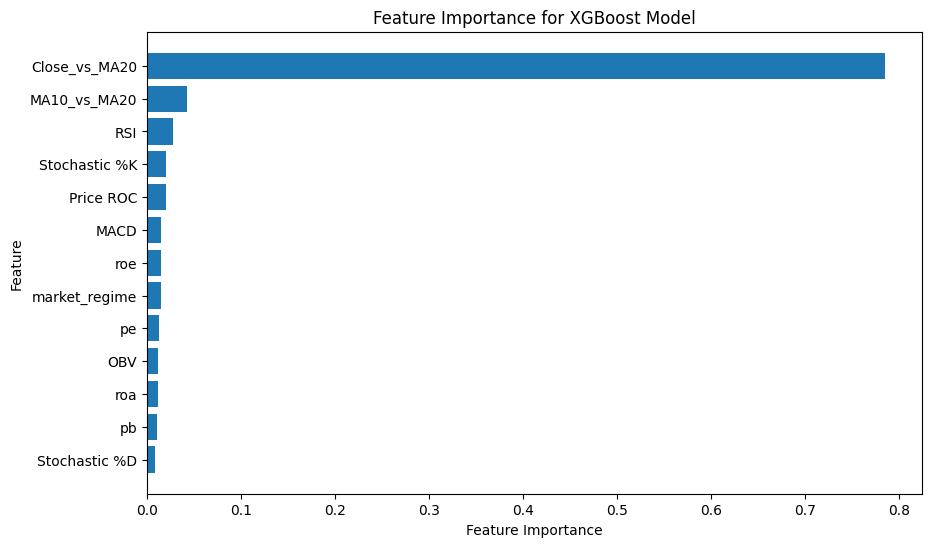

In [7]:
import pandas as pd
import numpy as np
import sys
import os
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import matplotlib.pyplot as plt

def xgboost(data: pd.DataFrame):
    X = data[['Stochastic %D', 'Stochastic %K', 'MACD', 'RSI', 'OBV', 'MA10_vs_MA20', 'Close_vs_MA20', 'Price ROC', 'market_regime', 'pb', 'pe', 'roe', 'roa']]
    y = data['Y']

    # Map the target variable to the expected range
    y = y.map({-1: 2, 0: 0, 1: 1})

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    param_distributions = {
        'n_estimators': [10, 50, 100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7, 10],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9],
        'gamma': [0, 0.1, 0.2],
        'reg_alpha': [0, 0.01, 0.1],
        'reg_lambda': [0.1, 1, 10]
    }

    xgb_model = XGBClassifier(objective='multi:softmax', random_state=42)

    xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_distributions,
                                    n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

    xgb_random.fit(X_train, y_train)

    print("Best Hyperparameters:", xgb_random.best_params_)

    best_xgb_model = xgb_random.best_estimator_
    y_train_pred = best_xgb_model.predict(X_train)
    y_test_pred = best_xgb_model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    train_class_report = classification_report(y_train, y_train_pred)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    test_class_report = classification_report(y_test, y_test_pred)

    print("Training Set Evaluation")
    print("Accuracy:", train_accuracy)
    print("Confusion Matrix:\n", train_conf_matrix)
    print("Classification Report:\n", train_class_report)

    print("Test Set Evaluation")
    print("Accuracy:", test_accuracy)
    print("Confusion Matrix:\n", test_conf_matrix)
    print("Classification Report:\n", test_class_report)

    feature_importances = best_xgb_model.feature_importances_
    features = X.columns
    feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance for XGBoost Model')
    plt.gca().invert_yaxis()
    plt.show()

    # Save the model
    joblib.dump(best_xgb_model, os.path.join(project_path, 'models/best_xgboost_model.pkl'))

# Example usage:
xgb_result = xgboost(data)
xgb_result


In [3]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 1.7 MB/s eta 0:00:0000:0100:010m

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
